In [7]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn_pandas import DataFrameMapper
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.decomposition import PCA
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import LinearRegression, Lasso, Ridge
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    import warnings
    print("Se importó correctamente")
except Exception as e:
    print(f"Error al importar dependencias: {e}")

Se importó correctamente


* Al tener el Data Set repartido en 4 archivos diferentes segun la plataforma donde se produjeron las ventas, paso a unificar todo en un mismo DataFrame

In [8]:
import pandas as pd
import os

# Ruta a la carpeta que contiene los archivos
ruta_carpeta = "./csv"

# Lista de archivos que deseas concatenar
archivos_csv = ["fravega.csv", "ecommerce.csv", "mercadolibre.csv", "megatone.csv"]

# Leer los archivos con el delimitador adecuado y almacenarlos en una lista de DataFrames
dfs = [pd.read_csv(os.path.join(ruta_carpeta, archivo), encoding='latin1', delimiter=';') for archivo in archivos_csv]

# Concatenar los DataFrames en uno solo
sales = pd.concat(dfs, ignore_index=True)

sales.sample(5)

,VALOR PRED.,ORDEN DE RETIRO,FECHA RETIRO OCA,COD. PRODUCTO,CANTIDAD,PRODUCTO,DTO %,FECHA COMPRA,PROVINCIA,LOCALIDAD,PLATAFORMA
4239,1.0,NaN,15/12/2022,1-23-15-004,1.0,NaN,NaN,6/12/2022,RÍO NEGRO,Ingeniero Jacobacci,mercadolibre
3613,1.0,NaN,13/10/2022,1-15-36-006,1.0,NaN,NaN,3/10/2022,SANTA CRUZ,Caleta Olivia,mercadolibre
1155,1,91285420,6/8/2021,NaN,2,CONJUNTO L. SANZIO TRADICIONAL 80CMX190CM,"$ 0,00",4/8/2021,TIERRA DEL FUEGO,Rio Grande,ecommerce
10979,1,109941103,NaN,NaN,1.0,COLCHÓN L. ROMA TRADICIONAL 140CMX190CM,4,1/9/2023,CÓRDOBA,GENERAL CABRERA,megatone
4573,1.0,NaN,9/2/2023,1-23-04-002,2.0,COMBO X2 ALM. VELLÓN 70,NaN,8/2/2023,TUCUMÁN,Concepción,mercadolibre


## Listado de variables 

#### Variables de entrada

* VALOR PRED.: Representa el valor del bulto.
* ORDEN DE RETIRO: Nro de orden por la cual la empresa identifica cada venta
* FECHA RETIRO OCA: Fecha donde OCA retira el producto
* COD. PRODUCTO: Identificador único de cada producto.
* PRODUCTO: Descripción del producto
* DTO %: Descuento aplicado en cada venta.
* FECHA COMPRA: Fecha en la que se realizó la compra del producto
* PROVINCIA: Nombre de la provincia donde se produjo de la venta
* LOCALIDAD: Nombre de la localidad donde se produjo de la venta
* PLATAFORMA: Canal o medio donde se produjo la venta.

#### Variable de salida: 

* CANTIDAD: representa el número de unidades vendidas por producto

#### Reorganizo las columnas en el orden deseado

In [9]:
orden_columnas = [
    'VALOR PRED.', 'ORDEN DE RETIRO', 'FECHA COMPRA', 'FECHA RETIRO OCA','COD. PRODUCTO', 'PRODUCTO', 'DTO %', 'PROVINCIA', 'LOCALIDAD', 'PLATAFORMA',
    'CANTIDAD'
]

# Reorganizar el DataFrame
sales = sales[orden_columnas]

# Mostrar las primeras filas del DataFrame reorganizado
print("Columnas reorganizadas:")
sales.sample(5)

Columnas reorganizadas:


,VALOR PRED.,ORDEN DE RETIRO,FECHA COMPRA,FECHA RETIRO OCA,COD. PRODUCTO,PRODUCTO,DTO %,PROVINCIA,LOCALIDAD,PLATAFORMA,CANTIDAD
9271,1,101032901,30/9/2022,4/10/2022,1-10-05-001,ALMOHADAS L.VISCOÉLASTICA 70CM,NaN,BUENOS AIRES,WILDE,megatone,2.0
7635,1,93944453,25/11/2021,30/11/2021,NaN,ALMOHADAS L.SUPER SOFT 70CM,0,MENDOZA,LUJAN DE CUYO,megatone,1.0
4979,1.0,NaN,11/4/2023,19/4/2023,1-12-37-002,COLCHÓN L. VASARI TRADICIONAL 80CMX190CM,NaN,NEUQUÉN,Neuquén,mercadolibre,1.0
259,1,NaN,16/6/2023,29/6/2023,1-14-15-006,CONJUNTO L. DALI TRADICIONAL 140CMX190CM,0,BUENOS AIRES,Mariano Acosta,fravega,1
7162,1,90470436,1/7/2021,2/7/2021,NaN,COLCHÓN L. ROMA TRADICIONAL 80CMX190CM,5,CORRIENTES,CORRIENTES,megatone,2.0


## Análisis detallado de un conjunto de variables

La variable CANTIDAD representa el número de unidades vendidas. Es la variable objetivo de este análisis, ya que el modelo buscará predecir su valor en función de las características del dataset.

Predecir CANTIDAD permitirá:

* Identificar tendencias de venta.
* Optimizar la planificación de inventarios.
* Mejorar la estrategia de ventas y promociones.

### Estadísticas descriptivas de la variable de salida

In [10]:
print("Estadísticas descriptivas de 'CANTIDAD':")
print(sales['CANTIDAD'].describe())

Estadísticas descriptivas de 'CANTIDAD':
count     11103
unique       15
top           1
freq       8976
Name: CANTIDAD, dtype: int64


In [11]:
# Convierto la columna 'CANTIDAD' a numérico, convirtiendo valores no válidos a NaN
sales['CANTIDAD'] = pd.to_numeric(sales['CANTIDAD'], errors='coerce')
# Reemplazo los valores NaN con 1
sales['CANTIDAD'] = sales['CANTIDAD'].fillna(1)
# Convierto la columna a enteros
sales['CANTIDAD'] = sales['CANTIDAD'].astype(int)

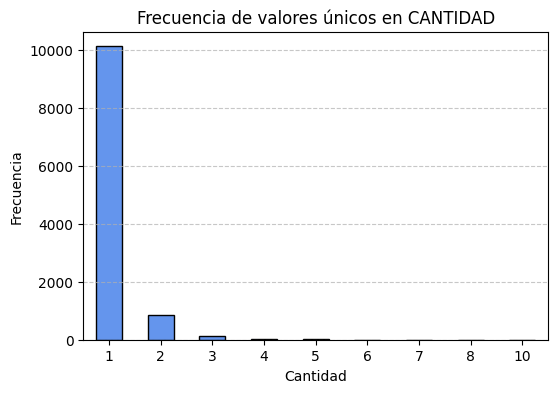

In [12]:
# Frecuencia de valores únicos en 'CANTIDAD'
frecuencia_cantidad = sales['CANTIDAD'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(6, 4))
frecuencia_cantidad.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Frecuencia de valores únicos en CANTIDAD', fontsize=12)
plt.xlabel('Cantidad', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Dado que la variable CANTIDAD contiene valores mayoritariamente iguales a 1, con algunos pocos registros variando entre 2 y 4, se decidió aplicar una transformación logarítmica a dicha columna con el fin de anonimizar los datos y evitar trabajar directamente con valores reales. La razón de esta transformación es la necesidad de proteger la información sensible proporcionada por la empresa, sin perder la estructura y los patrones del comportamiento de las ventas.

La transformación logarítmica aplicada es la siguiente: log(1 + x), donde x es el valor original de la columna CANTIDAD. Esta transformación fue elegida por varias razones:

Reducción de sesgo en valores extremos: La mayoría de los valores de CANTIDAD en el dataset son 1, lo que podría generar un sesgo en el análisis. La transformación logarítmica ayuda a reducir este sesgo, haciendo que la distribución de los datos sea más uniforme y permitiendo una mejor interpretación y modelado posterior.

Manejo de valores bajos: La función log(1 + x) tiene la ventaja de que transforma valores pequeños (como el 1, 2 o 3) sin distorsionar demasiado la información. Además, esta función asegura que valores cercanos a cero no generen problemas en el análisis, ya que log(1) da como resultado 0, lo cual no afecta negativamente los registros con pocos productos vendidos.

Escalado de los valores: Aunque la mayoría de los registros tienen un valor de CANTIDAD igual a 1, la transformación logarítmica cambia estos valores a una escala más adecuada para el análisis de tendencias y la predicción, facilitando la detección de patrones y relaciones con otras variables del dataset.

La transformación se aplicó utilizando la función log1p() de la librería numpy, la cual aplica el logaritmo natural a los valores de la columna CANTIDAD, sumando 1 a cada valor antes de aplicar la función logarítmica. Esta operación permitió suavizar la distribución de la variable, facilitando su posterior análisis y modelado.

Al aplicar esta transformación, se mantiene la integridad de los datos y se aseguran condiciones más apropiadas para el desarrollo del modelo de predicción, a la vez que se garantiza la anonimización de los datos sensibles relacionados con las cantidades vendidas.

In [13]:
# Aplicar logaritmo a la columna 'CANTIDAD'
sales['CANTIDAD'] = np.log1p(sales['CANTIDAD'])

## EDA, Limpieza y preprocesamiento

* Verificación de valores nulos en variable COD PRODUCTO y PRODUCTO:

In [14]:
# Contar nulos y valores vacíos en 'COD. PRODUCTO'
nulos_o_vacios_cod_producto = sales['COD. PRODUCTO'].isna().sum() + sales['COD. PRODUCTO'].eq('').sum()

# Contar nulos y valores vacíos en 'PRODUCTO'
nulos_o_vacios_producto = sales['PRODUCTO'].isna().sum() + sales['PRODUCTO'].str.strip().eq('').sum()

print(f"Valores nulos o vacíos en 'COD. PRODUCTO': {nulos_o_vacios_cod_producto}")
print(f"Valores nulos o vacíos en 'PRODUCTO': {nulos_o_vacios_producto}")

Valores nulos o vacíos en 'COD. PRODUCTO': 3298
Valores nulos o vacíos en 'PRODUCTO': 2198


- Tratamiento para determinar que para algunos de los COD PRODUCTOS detectados sin descripcion de Producto tenga en algun otro lado del data set la descripcion. Lo mismo para aquellas Productos detectados sin Cod Producto. 
El objetivo de esto es rellenar valores que se detectan nulos en las columnas de COD PRODUCTO y PRODUCTO.

In [15]:
# Crear un mapeo único entre COD PRODUCTO y PRODUCTO
mapeo_cod_producto = sales[['COD. PRODUCTO', 'PRODUCTO']].drop_duplicates()

print("Mapa único entre códigos y productos:")
mapeo_cod_producto.shape

Mapa único entre códigos y productos:


(478, 2)

In [16]:
# Convertir el mapeo a un diccionario para facilitar su uso
mapeo_dict = mapeo_cod_producto.set_index('PRODUCTO')['COD. PRODUCTO'].to_dict()

# Completar o corregir la columna 'COD PRODUCTO'
sales['COD. PRODUCTO'] = sales['PRODUCTO'].map(mapeo_dict)

In [17]:
# Detectar inconsistencias entre 'COD PRODUCTO' y 'PRODUCTO'
inconsistencias = sales[sales['PRODUCTO'] != sales['COD. PRODUCTO'].map(mapeo_dict)]

In [18]:
sales['PRODUCTO'] = sales['COD. PRODUCTO'].map({v: k for k, v in mapeo_dict.items()})


In [19]:
sales.sample(5)

,VALOR PRED.,ORDEN DE RETIRO,FECHA COMPRA,FECHA RETIRO OCA,COD. PRODUCTO,PRODUCTO,DTO %,PROVINCIA,LOCALIDAD,PLATAFORMA,CANTIDAD
10229,1,106155653,25/4/2023,NaN,1-12-40-003,COLCHÓN L. ROMA TRADICIONAL 90CMX190CM,4,ENTRE RÍOS,AVENIDA EJERCITO PARANA,megatone,0.693147
4775,1.0,NaN,29/3/2023,5/4/2023,NaN,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,NaN,TUCUMÁN,barrio lomas de tafi,mercadolibre,0.693147
10997,1,110240912,12/9/2023,NaN,NaN,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,4,SANTA CRUZ,CALETA OLIVIA,megatone,0.693147
4242,1.0,NaN,6/12/2022,15/12/2022,1-11-16-017,NaN,NaN,CÓRDOBA,Córdoba,mercadolibre,0.693147
2713,1.0,98297692,2/6/2022,9/6/2022,1-11-16-017,NaN,10.0,SANTA FE,Esperanza,mercadolibre,0.693147


In [20]:
faltantes_codproducto = sales[sales['COD. PRODUCTO'].isna()]
# Obtener los valores únicos de la columna 'PRODUCTO'
valores_unicos_producto = faltantes_codproducto['PRODUCTO'].unique()

print(valores_unicos_producto)

['CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM']


In [21]:
productos_con_nan = sales[sales['COD. PRODUCTO'].isna()]

# Mostrar valores únicos de la columna 'PRODUCTO' donde 'COD PRODUCTO' es NaN
valores_producto_nan = productos_con_nan['PRODUCTO'].unique()

print("Valores únicos en la columna 'PRODUCTO' donde 'COD PRODUCTO' es NaN:")
print(valores_producto_nan)

Valores únicos en la columna 'PRODUCTO' donde 'COD PRODUCTO' es NaN:
['CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM']


In [22]:
sales.loc[sales['COD. PRODUCTO'].isna(), 'COD. PRODUCTO'] = '1-20-20-200'

In [23]:
sales.sample(2)

,VALOR PRED.,ORDEN DE RETIRO,FECHA COMPRA,FECHA RETIRO OCA,COD. PRODUCTO,PRODUCTO,DTO %,PROVINCIA,LOCALIDAD,PLATAFORMA,CANTIDAD
8224,1,97437573,4/5/2022,6/5/2022,1-12-40-002,COLCHÓN L. ROMA TRADICIONAL 80CMX190CM,NaN,CÓRDOBA,CAPILLA DEL MONTE,megatone,1.386294
3351,1.0,NaN,10/9/2022,28/9/2022,1-11-16-017,NaN,NaN,NEUQUÉN,Junín De Los Andes,mercadolibre,0.693147


* Verificamos si quedan filas donde 'COD PRODUCTO' es nulo

In [24]:
sin_codproducto = sales[sales['COD. PRODUCTO'].isna()]
print("Filas con 'COD PRODUCTO' faltante:")
sin_codproducto.shape

Filas con 'COD PRODUCTO' faltante:


(0, 11)

In [25]:
# Mostrar filas donde 'PRODUCTO' es NaN
sin_producto = sales[sales['PRODUCTO'].isna()]
print("Filas con 'PRODUCTO' faltante:")
sin_producto.shape

Filas con 'PRODUCTO' faltante:


(2212, 11)

In [26]:
# Contar valores únicos en 'COD. PRODUCTO'
valores_unicos_cod_producto = sin_producto['COD. PRODUCTO'].unique()

# Contar la cantidad de valores únicos
cantidad_valores_unicos = len(valores_unicos_cod_producto)
print(valores_unicos_cod_producto)

['1-11-16-017']


In [27]:
sales.loc[sales['PRODUCTO'].isna() , 'PRODUCTO'] = 'ALMOHADAS M.COPO 90CM'

In [28]:
# Contar valores nulos en cada columna
valores_nulos = sales.isna().sum()

print("Cantidad de valores nulos por columna:")
print(valores_nulos)

Cantidad de valores nulos por columna:
VALOR PRED.          254
ORDEN DE RETIRO     3852
FECHA COMPRA          40
FECHA RETIRO OCA    1104
COD. PRODUCTO          0
PRODUCTO               0
DTO %               6457
PROVINCIA             57
LOCALIDAD            247
PLATAFORMA             0
CANTIDAD               0
dtype: int64


* Limpieza y correccion de valores en las columnas. 

In [29]:
# Asignar el valor de 'PROVINCIA' a 'LOCALIDAD' donde 'LOCALIDAD' es nulo
sales['LOCALIDAD'] = sales['LOCALIDAD'].fillna(sales['PROVINCIA'])

# Asignar 'Descripcion faltante' donde 'COD. PRODUCTO' sea NaN
sales['COD. PRODUCTO'] = sales['COD. PRODUCTO'].fillna('Descripcion faltante')

#Convertir la columna 'DTO' a valores enteros
sales['DTO %'] = sales['DTO %'].replace(['$0,00', 0.0], '0').fillna('0')

In [30]:
# Verificar valores nulos restantes en todo el dataset
print("Valores nulos restantes por columna:")
print(sales.isna().sum())

Valores nulos restantes por columna:
VALOR PRED.          254
ORDEN DE RETIRO     3852
FECHA COMPRA          40
FECHA RETIRO OCA    1104
COD. PRODUCTO          0
PRODUCTO               0
DTO %                  0
PROVINCIA             57
LOCALIDAD             57
PLATAFORMA             0
CANTIDAD               0
dtype: int64


In [31]:
# Eliminar las columnas que no voy a utilizar
sales = sales.drop(columns=['VALOR PRED.', 'ORDEN DE RETIRO', 'FECHA RETIRO OCA'])
# Eliminar filas donde 'PROVINCIA' sea NaN
sales = sales.dropna(subset=['PROVINCIA'])
# Convertir la columna 'CANTIDAD' a enteros
sales['CANTIDAD'] = sales['CANTIDAD'].astype(int)
# Convertir la columna 'DTO %' a tipo numérico para reemplazar los valores que no son % de descuento sino monto en pesos
sales['DTO %'] = pd.to_numeric(sales['DTO %'], errors='coerce')
# Reemplazar valores de DTO % fuera del rango (negativos o mayores a 50) y nulos con 0
sales['DTO %'] = sales['DTO %'].apply(lambda x: 0 if pd.isna(x) or x > 50 or x < 0 else x)


In [32]:
# Eliminar filas donde 'FECHA COMPRA' sea NaN, REVISAR para buscar la fecha 
sales = sales.dropna(subset=['FECHA COMPRA'])

In [33]:
sales['FECHA COMPRA'] = pd.to_datetime(sales['FECHA COMPRA'], errors='coerce')

sales['FECHA COMPRA'] = sales['FECHA COMPRA'].ffill()  # Rellenar con el valor anterior
sales['FECHA COMPRA'] = sales['FECHA COMPRA'].bfill()  # Si no hay anterior, usar el siguiente

sales = sales.sort_values(by='FECHA COMPRA')

C:\Users\bosch\AppData\Local\Temp\ipykernel_38928\3226930836.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales['FECHA COMPRA'] = pd.to_datetime(sales['FECHA COMPRA'], errors='coerce')


In [34]:
sales.sample(5)

,FECHA COMPRA,COD. PRODUCTO,PRODUCTO,DTO %,PROVINCIA,LOCALIDAD,PLATAFORMA,CANTIDAD
2064,2021-12-16,1-20-20-200,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,0.0,SANTA CRUZ,PUERTO SANTA CRUZ,ecommerce,1
131,2023-05-09,1-20-20-200,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,0.0,BUENOS AIRES,Tristán Suarez,fravega,0
4423,2023-01-05,1-14-60-006,CONJ GILOT TRAD 140X190,0.0,NEUQUÉN,Zapala,mercadolibre,0
3593,2022-10-02,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,RÍO NEGRO,General Fernández Oro,mercadolibre,0
8993,2022-08-26,1-20-20-200,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,0.0,BUENOS AIRES,MAR DEL PLATA,megatone,0


In [35]:
# Verificar valores nulos restantes en todo el dataset
print("Valores nulos restantes por columna:")
print(sales.isna().sum())

Valores nulos restantes por columna:
FECHA COMPRA     0
COD. PRODUCTO    0
PRODUCTO         0
DTO %            0
PROVINCIA        0
LOCALIDAD        0
PLATAFORMA       0
CANTIDAD         0
dtype: int64


## A modo resumen un detalle de las transformaciones realizadas a las variables 

* Valor Pred : Eliminada ya que no aporta valor al modelo
* Orden de Retiro : Eliminada ya que no aporta valor al modelo, es un identificador de la venta
* Fecha retiro OCA: Eliminada ya que no aporta valor al modelo
* Fecha compra : El data set inical estaba ordenado por fecha, cuando algun registro no contaba con la misma se buscó insertar la mas cercana en el índice anterior.
* Cantidad: se convirtió a valor entero en todos sus casos.
* Cod. Producto: se rellenó los valores faltantes comparando la descripcion del producto en otras celdas que tenga el cod producto cargado.
* Producto: se rellenó los valores faltantes comparando el cod. producto en otras celdas que tenga la misma descripción del producto cargada. 
* DTO %: Algunos registros no tenian valor porcentual sino numérico, por lo que cuando se encontraba un valor mayor a 50 se insertó 0.
* Localidad: Se rellenó para los valores faltantes con el nombre de la provincia como valor genérico, posiblemente no aporte mucho valor al modelo.
* Provincia: Se eliminaron los registros que no contaban con provincia asignada


## Realizar un análisis individual de cada variable de entrada que será utilizada. A partir del mismo debería poder conocerse la distribución de los datos, si existen valores raros, su relación con la variable de salida, etc.

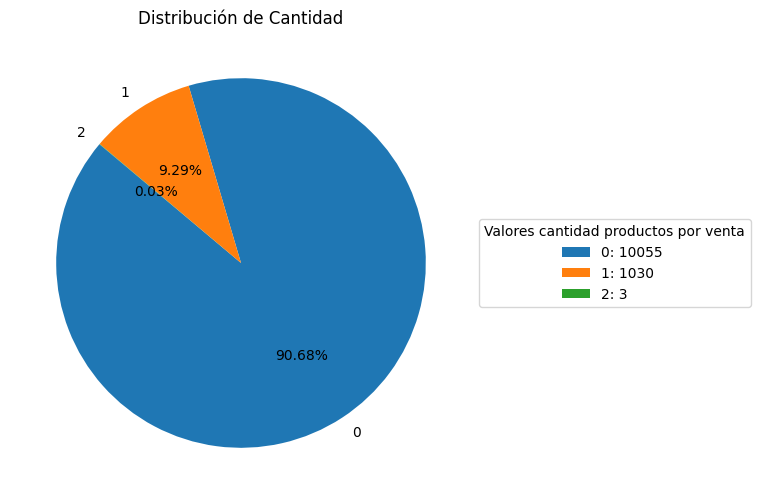

In [36]:
import matplotlib.pyplot as plt

# Filtrar valores no nulos y calcular frecuencia
cantidad_frecuencia = sales['CANTIDAD'].value_counts()

plt.figure(figsize=(6, 6))  # Ajustar tamaño del gráfico
wedges, texts, autotexts = plt.pie(
    cantidad_frecuencia, 
    labels=cantidad_frecuencia.index, 
    autopct='%2.2f%%', 
    startangle=140
)
leyenda = [f"{index}: {value} " for index, value in cantidad_frecuencia.items()]
plt.legend(
    wedges, 
    leyenda, 
    title="Valores cantidad productos por venta", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.title('Distribución de Cantidad')
plt.show()



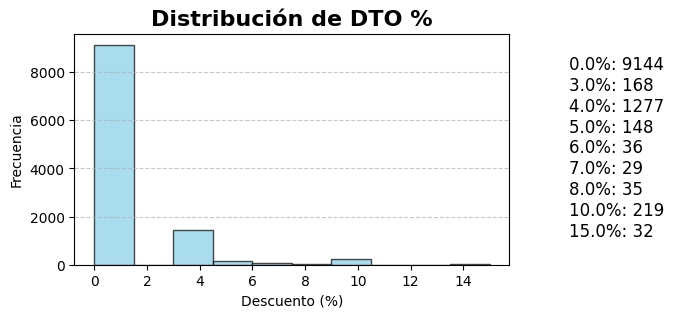

In [37]:
dto_frecuencia = sales['DTO %'].value_counts().sort_index()

plt.figure(figsize=(6, 3))
plt.hist(sales['DTO %'], bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Distribución de DTO %', fontsize=16, fontweight='bold')
plt.xlabel('Descuento (%)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

frecuencias_texto = "\n".join([f"{index}%: {value}" for index, value in dto_frecuencia.items()])
plt.gcf().text(0.95, 0.5, frecuencias_texto, fontsize=12, verticalalignment='center')
plt.subplots_adjust(right=0.85)

plt.show()

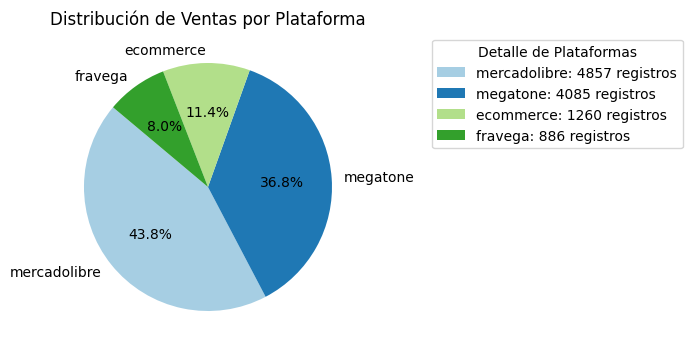

In [38]:
frecuencia_plataforma = sales['PLATAFORMA'].value_counts()

plt.figure(figsize=(4, 8))
plt.pie(
    frecuencia_plataforma,
    labels=frecuencia_plataforma.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribución de Ventas por Plataforma', fontsize=12)
plt.legend(
    labels=[f"{index}: {value} registros" for index, value in frecuencia_plataforma.items()],
    title="Detalle de Plataformas",    
    loc="center left",
    bbox_to_anchor=(1.2, 0.8)  
)

plt.show()

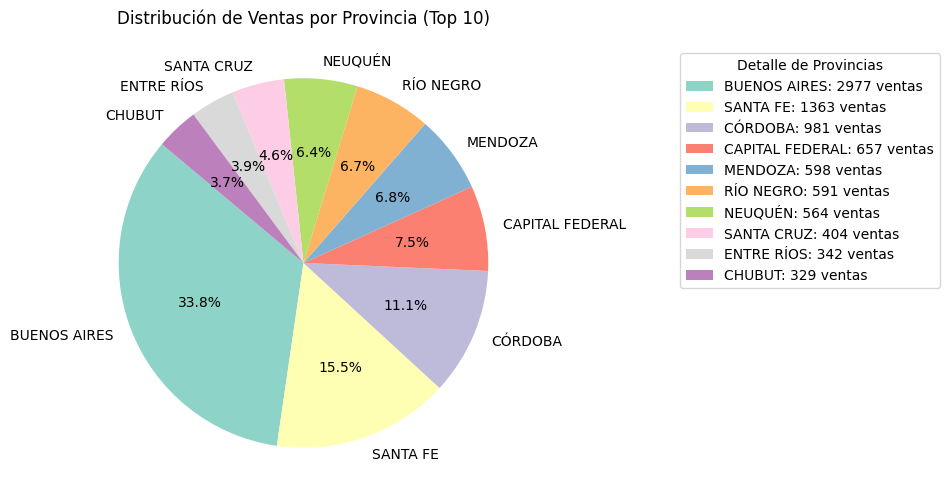

In [39]:
frecuencia_provincia = sales['PROVINCIA'].value_counts().head(10)

plt.figure(figsize=(6, 6))
plt.pie(
    frecuencia_provincia,
    labels=frecuencia_provincia.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Distribución de Ventas por Provincia (Top 10)', fontsize=12)
plt.legend(
    labels=[f"{index}: {value} ventas" for index, value in frecuencia_provincia.items()],
    title="Detalle de Provincias",
    loc="center left", 
    bbox_to_anchor=(1.3, 0.7) 
)

plt.show()


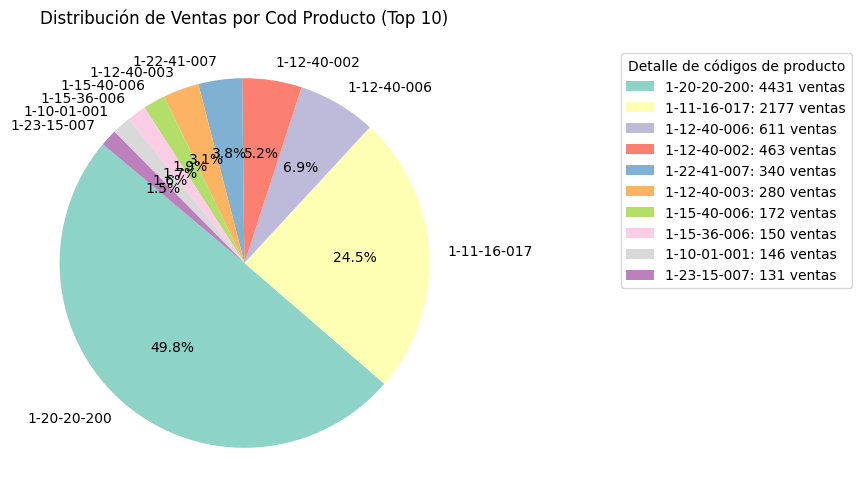

In [40]:
frecuencia_provincia = sales['COD. PRODUCTO'].value_counts().head(10)

plt.figure(figsize=(6, 6))
plt.pie(
    frecuencia_provincia,
    labels=frecuencia_provincia.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Distribución de Ventas por Cod Producto (Top 10)', fontsize=12)
plt.legend(
    labels=[f"{index}: {value} ventas" for index, value in frecuencia_provincia.items()],
    title="Detalle de códigos de producto",
    loc="center left", 
    bbox_to_anchor=(1.3, 0.7) 
)

plt.show()

## Transformaciones Fecha Compra

In [41]:
# Convertir 'FECHA COMPRA' a datetime especificando el formato exacto
sales['FECHA COMPRA'] = pd.to_datetime(sales['FECHA COMPRA'], format='%d/%m/%Y')

In [42]:
# Crear columnas temporales
sales['AÑO'] = sales['FECHA COMPRA'].dt.year
sales['MES'] = sales['FECHA COMPRA'].dt.month

sales.sample(10)

,FECHA COMPRA,COD. PRODUCTO,PRODUCTO,DTO %,PROVINCIA,LOCALIDAD,PLATAFORMA,CANTIDAD,AÑO,MES
9155,2022-09-20,1-10-02-002,ALMOHADAS L.PLACA 80CM,0.0,CAPITAL FEDERAL,CAPITAL FEDERAL,megatone,0,2022,9
10518,2023-05-11,1-11-02-002,COLCHÓN L. SUPER CONFORT TRADICIONAL 80CMX190CM,0.0,CAPITAL FEDERAL,ALVAREZ CRISOSTOMO,megatone,0,2023,5
8473,2022-06-04,1-12-40-002,COLCHÓN L. ROMA TRADICIONAL 80CMX190CM,3.0,CAPITAL FEDERAL,14 DE julio,megatone,0,2022,6
8939,2022-08-17,1-12-40-002,COLCHÓN L. ROMA TRADICIONAL 80CMX190CM,0.0,TUCUMÁN,SAN MIGUEL DE TUCUMAN,megatone,1,2022,8
856,2024-01-12,1-20-20-200,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,0.0,BUENOS AIRES,Longchamps,fravega,0,2024,1
9265,2022-09-27,1-12-40-002,COLCHÓN L. ROMA TRADICIONAL 80CMX190CM,0.0,BUENOS AIRES,HURLINGHAM,megatone,0,2022,9
3391,2022-09-13,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,BUENOS AIRES,La Plata,mercadolibre,0,2022,9
2426,2022-04-24,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,BUENOS AIRES,Gregorio de Laferrere,mercadolibre,0,2022,4
3949,2022-11-04,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,CHUBUT,Comodoro Rivadavia,mercadolibre,0,2022,11
3472,2022-09-23,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,NEUQUÉN,Neuquén,mercadolibre,1,2022,9


* Distribucion de ventas por mes

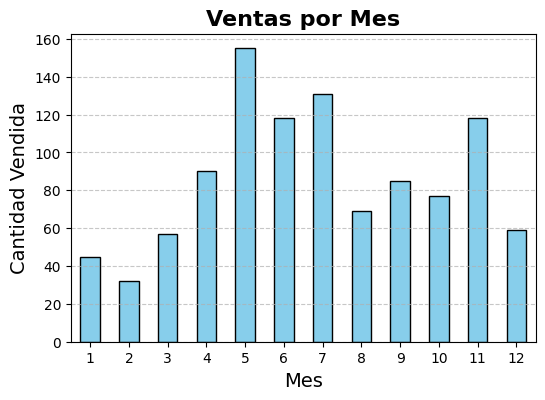

In [43]:
ventas_por_mes = sales.groupby('MES')['CANTIDAD'].sum()

plt.figure(figsize=(6, 4))
ventas_por_mes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ventas por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## Adapto el dataset para analizar tanto patrones semanales como mensuales. El objetivo es trabajar con la predicción por período de tiempo y agrupar las ventas por un intervalo de tiempo y producto

In [44]:
# Agregar columna de EVENTO
sales['EVENTO'] = sales['MES'].apply(
    lambda x: 'Hot Sale' if x == 5 else ('CyberMonday' if x == 11 else 'Estandar')
)

# Agrupar por 'COD. PRODUCTO', 'AÑO', y 'MES', sumando las cantidades vendidas ('CANTIDAD_TOTAL')
sales_grouped = sales.groupby(['AÑO', 'MES', 'PRODUCTO', 'EVENTO', 'COD. PRODUCTO']).agg(
    CANTIDAD_TOTAL=('CANTIDAD', 'sum')  # Sumamos las cantidades vendidas por mes y producto
).reset_index()
# Verificar que los productos sin ventas estén con CANTIDAD_TOTAL = 0
sales.sample(10)

,FECHA COMPRA,COD. PRODUCTO,PRODUCTO,DTO %,PROVINCIA,LOCALIDAD,PLATAFORMA,CANTIDAD,AÑO,MES,EVENTO
3532,2022-09-28,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,BUENOS AIRES,Monte Hermoso,mercadolibre,0,2022,9,Estandar
4145,2022-11-25,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,BUENOS AIRES,Mar de Ajo,mercadolibre,0,2022,11,CyberMonday
3941,2022-11-03,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,BUENOS AIRES,Carapachay,mercadolibre,0,2022,11,CyberMonday
6135,2023-05-21,1-22-41-007,CONJUNTO L. MARINERA TRAD RESORTE 90CMX190CM S...,0.0,BUENOS AIRES,Tandil,mercadolibre,0,2023,5,Hot Sale
5469,2023-05-08,1-22-41-007,CONJUNTO L. MARINERA TRAD RESORTE 90CMX190CM S...,0.0,BUENOS AIRES,buenos aires,mercadolibre,1,2023,5,Hot Sale
10261,2023-05-04,1-15-40-006,CONJUNTO L. ROMA TRADICIONAL 140CMX190CM,4.0,BUENOS AIRES,MAR DEL PLATA,megatone,0,2023,5,Hot Sale
2731,2022-06-03,1-11-16-017,ALMOHADAS M.COPO 90CM,15.0,BUENOS AIRES,San Fernando,mercadolibre,0,2022,6,Estandar
657,2023-09-07,1-20-20-200,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,0.0,BUENOS AIRES,Merlo,fravega,0,2023,9,Estandar
2537,2022-05-19,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,NEUQUÉN,Rincón de los Sauces,mercadolibre,0,2022,5,Hot Sale
10840,2023-07-01,1-12-40-002,COLCHÓN L. ROMA TRADICIONAL 80CMX190CM,4.0,SAN LUIS,SAN LUIS,megatone,1,2023,7,Estandar


In [45]:
# Asegúrate de que la columna 'FECHA_COMPRA' esté en formato datetime
sales['FECHA COMPRA'] = pd.to_datetime(sales['FECHA COMPRA'], format='%d-%m-%Y')

# Ordenar el dataset por fecha (AÑO, MES)
sales = sales.sort_values(by='FECHA COMPRA', ascending=True)

# Obtener el primer y último mes con sus respectivos años
primer_mes = sales['FECHA COMPRA'].min()
ultimo_mes = sales['FECHA COMPRA'].max()

# Mostrar el primer y último mes con año
print(f"Primer mes registrado: {primer_mes.strftime('%B %Y')}")
print(f"Último mes registrado: {ultimo_mes.strftime('%B %Y')}")

Primer mes registrado: October 2002
Último mes registrado: January 2024


In [46]:
cod_productos_unicos = sales['COD. PRODUCTO'].unique()
print(f"TODOS LOS COD. PRODUCTO: {cod_productos_unicos}")

# Contar cuántos COD. PRODUCTO únicos existen
num_cod_productos_unicos = len(sales['COD. PRODUCTO'].unique())

# Mostrar el resultado
print(f"Cantidad de COD. PRODUCTO únicos: {num_cod_productos_unicos}")


TODOS LOS COD. PRODUCTO: ['1-12-40-006' '1-12-40-003' '1-12-40-002' '1-10-05-002' '1-10-03-002'
 '1-10-03-001' '1-11-06-002' '1-10-04-002' '1-10-05-001' '1-20-20-200'
 '1-12-30-006' '1-14-15-002' '1-12-40-004' '1-14-11-017' '1-11-06-006'
 '1-11-12-006' '1-14-11-006' '1-11-06-004' '1-11-11-017' '1-11-11-006'
 '1-15-40-006' '1-12-27-006' '1-12-27-018' '1-10-01-001' '1-10-02-001'
 '1-10-01-002' '1-11-06-003' '1-12-36-002' '1-22-41-002' '1-15-36-006'
 '1-15-37-019' '1-10-02-002' '1-11-16-017' '1-11-02-002' '1-15-38-019'
 '1-14-11-019' '1-11-06-005' '1-12-27-002' '1-12-38-017' '1-11-17-017'
 '1-11-16-002' '1-14-17-019' '1-11-02-06' '1-14-17-018' '1-22-41-003'
 '1-14-17-017' '1-12-37-002' '1-15-38-006' '1-11-12-017' '1-15-40-004'
 '1-15-38-018' '1-11-11-018' '1-12-37-019' '1-11-08-002' '1-15-27-018'
 '1-14-11-018' '1-23-16-001' '1-12-27-017' '1-14-16-002' '1-11-08-003'
 '1-11-12-018' '1-23-37-004' '1-14-07-006' '1-14-10-019' '1-11-07-006'
 '1-15-40-003' '1-23-36-006' '1-13-32-006' '1-11-10-0

In [47]:
sales.sample(10)

,FECHA COMPRA,COD. PRODUCTO,PRODUCTO,DTO %,PROVINCIA,LOCALIDAD,PLATAFORMA,CANTIDAD,AÑO,MES,EVENTO
9093,2022-09-05,1-12-40-003,COLCHÓN L. ROMA TRADICIONAL 90CMX190CM,0.0,RÍO NEGRO,VILLA REGINA,megatone,1,2022,9,Estandar
2158,2021-12-31,1-20-20-200,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,0.0,CÓRDOBA,REDUCCION,ecommerce,0,2021,12,Estandar
4809,2023-03-31,1-20-20-200,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,0.0,BUENOS AIRES,José C. Paz,mercadolibre,0,2023,3,Estandar
2955,2022-06-30,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,BUENOS AIRES,Capitan Sarmiento. Barrio los milagros,mercadolibre,0,2022,6,Estandar
5880,2023-05-10,1-20-20-200,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,0.0,SANTA CRUZ,Pico Truncado,mercadolibre,0,2023,5,Hot Sale
6123,2023-05-17,1-12-37-017,COLCHÓN L. VASARI TRADICIONAL 160CMX200CM,0.0,SANTA FE,Santa fe,mercadolibre,0,2023,5,Hot Sale
4382,2022-12-27,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,NEUQUÉN,Neuquén,mercadolibre,0,2022,12,Estandar
11042,2023-10-07,1-12-40-003,COLCHÓN L. ROMA TRADICIONAL 90CMX190CM,4.0,SANTA FE,CAPITAN BERMUDEZ,megatone,0,2023,10,Estandar
4909,2023-04-06,1-20-20-200,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,0.0,RÍO NEGRO,Allen,mercadolibre,0,2023,4,Estandar
3444,2022-09-21,1-11-16-017,ALMOHADAS M.COPO 90CM,0.0,RÍO NEGRO,Bariloche,mercadolibre,0,2022,9,Estandar


In [48]:
sales.shape

(11088, 11)

In [49]:
# Crear un DataFrame con todas las combinaciones posibles de AÑO, MES y COD. PRODUCTO
# Primero obtenemos todos los valores únicos de 'AÑO', 'MES', y 'COD. PRODUCTO'
años = sales['AÑO'].unique()
meses = sales['MES'].unique()
cod_productos_unicos = sales['COD. PRODUCTO'].unique()

# Crear todas las combinaciones posibles (todos los productos por cada año y mes)
combinaciones = pd.MultiIndex.from_product([años, meses, cod_productos_unicos], names=['AÑO', 'MES', 'COD. PRODUCTO'])

# Crear un DataFrame con estas combinaciones
combinaciones_df = pd.DataFrame(index=combinaciones).reset_index()

# Agrupar el dataset original para obtener las ventas totales
sales_grouped = sales.groupby(['AÑO', 'MES', 'COD. PRODUCTO'], as_index=False).agg(
    CANTIDAD_TOTAL=('CANTIDAD', 'sum'),
    PRODUCTO=('PRODUCTO', 'first'),
    EVENTO=('EVENTO', 'first')
)

# Merge con las combinaciones para obtener el valor 0 para los productos no vendidos
sales_final = pd.merge(combinaciones_df, sales_grouped, on=['AÑO', 'MES', 'COD. PRODUCTO'], how='left')

sales_final['CANTIDAD_TOTAL'] = sales_final['CANTIDAD_TOTAL'].fillna(0)
# Merge con las combinaciones para obtener el valor 0 para los productos no vendidos
sales_final = pd.merge(combinaciones_df, sales_grouped, on=['AÑO', 'MES', 'COD. PRODUCTO'], how='left')

In [50]:
sales_final.sample(15)

,AÑO,MES,COD. PRODUCTO,CANTIDAD_TOTAL,PRODUCTO,EVENTO
4194,2023,8,1-12-24-002,NaN,NaN,NaN
89,2002,10,1-14-60-004,NaN,NaN,NaN
3564,2023,10,1-11-06-005,NaN,NaN,NaN
1282,2021,12,1-10-05-001,0.0,ALMOHADAS L.VISCOÉLASTICA 70CM,Estandar
670,2002,8,1-22-01-007,NaN,NaN,NaN
1109,2002,3,1-10-02-002,NaN,NaN,NaN
2314,2021,3,1-11-12-018,NaN,NaN,NaN
196,2002,4,1-12-40-006,NaN,NaN,NaN
3519,2022,3,1-14-60-004,NaN,NaN,NaN
5663,2024,1,1-11-10-017,NaN,NaN,NaN


In [51]:
sales_final['EVENTO'] = sales_final['MES'].apply(
    lambda x: 'Hot Sale' if x == 5 else ('CyberMonday' if x == 11 else 'Estandar')
)

sales_final['CANTIDAD_TOTAL'] = sales_final['CANTIDAD_TOTAL'].apply(
    lambda x: 0 if pd.isna(x) else x
)
sales_rename = sales[['COD. PRODUCTO', 'PRODUCTO']].rename(columns={'PRODUCTO': 'DESC_PRODUCTO'})
# Realizar el merge sin crear columnas duplicadas
sales_final = pd.merge(sales_final, sales_rename, on='COD. PRODUCTO', how='left')



In [52]:
sales_final.sample(10)

,AÑO,MES,COD. PRODUCTO,CANTIDAD_TOTAL,PRODUCTO,EVENTO,DESC_PRODUCTO
571678,2024,5,1-14-15-002,0.0,NaN,Hot Sale,CONJUNTO L. DALI TRADICIONAL 80CMX190CM
198432,2021,7,1-15-40-004,0.0,NaN,Estandar,CONJUNTO L. ROMA TRADICIONAL 100CMX190CM
411912,2023,12,1-10-05-001,0.0,NaN,Estandar,ALMOHADAS L.VISCOÉLASTICA 70CM
611528,2024,9,1-10-05-001,0.0,NaN,Estandar,ALMOHADAS L.VISCOÉLASTICA 70CM
144159,2021,12,1-12-40-006,0.0,COLCHÓN L. ROMA TRADICIONAL 140CMX190CM,Estandar,COLCHÓN L. ROMA TRADICIONAL 140CMX190CM
610345,2024,9,1-12-40-006,0.0,NaN,Estandar,COLCHÓN L. ROMA TRADICIONAL 140CMX190CM
654921,2024,3,1-12-40-003,0.0,NaN,Estandar,COLCHÓN L. ROMA TRADICIONAL 90CMX190CM
84086,2002,9,1-14-11-006,0.0,NaN,Estandar,CONJUNTO L. ATENAS TRADICIONAL 140CMX190CM
22223,2002,4,1-12-40-006,0.0,NaN,Estandar,COLCHÓN L. ROMA TRADICIONAL 140CMX190CM
421471,2023,4,1-12-40-006,0.0,COLCHÓN L. ROMA TRADICIONAL 140CMX190CM,Estandar,COLCHÓN L. ROMA TRADICIONAL 140CMX190CM


### Tendencias de mi nuevo data set

#### Evolución de ventas mensuales generales. Se grafica la evolución de las ventas totales en todos los productos. 

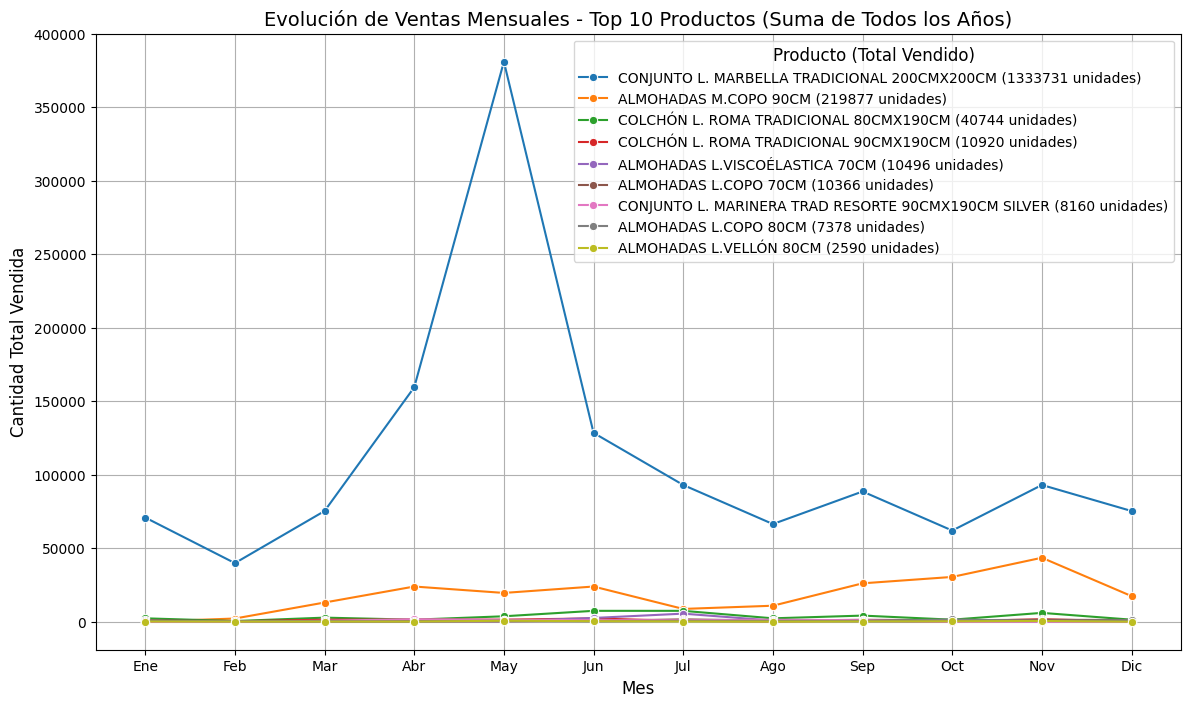

In [53]:
top_productos = sales_final.groupby("COD. PRODUCTO")["CANTIDAD_TOTAL"].sum().nlargest(10).index
ventas_top_productos = sales_final[sales_final["COD. PRODUCTO"].isin(top_productos)]

# Obtengo el nombre del producto correspondiente a cada código
mapa_productos = ventas_top_productos[['COD. PRODUCTO', 'PRODUCTO']].drop_duplicates().set_index('COD. PRODUCTO')['PRODUCTO'].to_dict()
ventas_top_productos.loc[:, 'PRODUCTO'] = ventas_top_productos['COD. PRODUCTO'].map(mapa_productos)

# Agrupo sumando ventas totales por mes y ordeno los productos por cantidad total de ventas
ventas_top_productos = ventas_top_productos.groupby(['MES', 'PRODUCTO'])['CANTIDAD_TOTAL'].sum().reset_index()
total_ventas_por_producto = ventas_top_productos.groupby("PRODUCTO")["CANTIDAD_TOTAL"].sum().sort_values(ascending=False)
productos_ordenados = total_ventas_por_producto.index

plt.figure(figsize=(14,8))
sns.lineplot(data=ventas_top_productos, x="MES", y="CANTIDAD_TOTAL", hue="PRODUCTO", marker="o", palette="tab10", hue_order=productos_ordenados)

handles, labels = plt.gca().get_legend_handles_labels()
nuevas_labels = [f"{prod} ({int(total_ventas_por_producto[prod])} unidades)" for prod in labels]
plt.legend(handles, nuevas_labels, title="Producto (Total Vendido)", fontsize=10, title_fontsize=12)

# etiquetas
plt.title("Evolución de Ventas Mensuales - Top 10 Productos (Suma de Todos los Años)", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad Total Vendida", fontsize=12)
plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid()

plt.show()

## Matriz de correlación

In [54]:
#Preparo el dataset para realizar la matriz de correlación
#sales_final = pd.get_dummies(sales_final, columns=['PLATAFORMA', 'EVENTO'], drop_first=False)
#sales.columns = sales.columns.str.replace('PLATAFORMA_', '').str.replace('EVENTO_', '')

# Convertir todas las columnas booleanas a enteros (1 para True, 0 para False)
#sales[['ecommerce', 'fravega', 'megatone', 'mercadolibre', 'CyberMonday', 'Estandar', 'Hot Sale']] = \
#sales[['ecommerce', 'fravega', 'megatone', 'mercadolibre', 'CyberMonday', 'Estandar', 'Hot Sale']].astype(int)




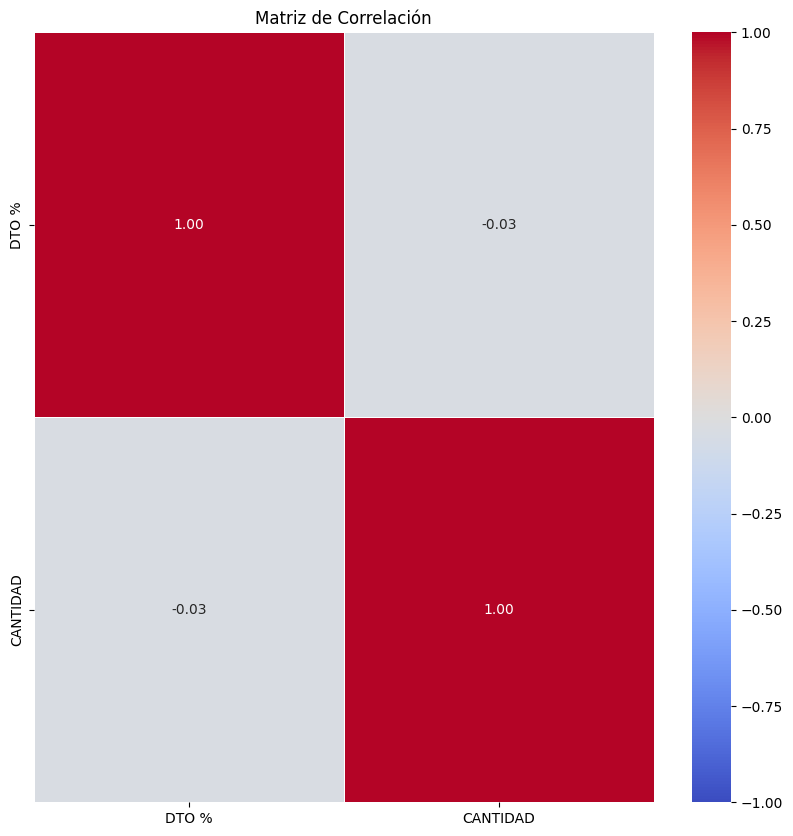

In [55]:
# Seleccionamos las variables numéricas (esto incluye las nuevas columnas de One Hot Encoding)
variables_numericas_ampliadas = sales.select_dtypes(include=['float64', 'int64'])

correlacion_ampliada = variables_numericas_ampliadas.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlacion_ampliada, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Agregar título y etiquetas
plt.title("Matriz de Correlación", fontsize=12)
plt.show()




Podemos observar que: 

CANTIDAD_TOTAL:
- No parece haber una relación significativa entre la cantidad vendida y el descuento promedio aplicado, lo cual es interesante. Esto podría sugerir que el descuento no es un factor determinante para el volumen de ventas, o bien que otras variables más relevantes influyen en las ventas.
- La CANTIDAD_TOTAL está levemente correlacionada con las plataformas. Esto podría indicar que ciertas plataformas (como ecommerce y mercadolibre) podrían tener una mayor cantidad de ventas.

DTO_PROMEDIO:
- Hay una pequeña correlación positiva (0.29) entre el descuento promedio y megatone, lo que sugiere que cuando los productos de megatone tienen mayores descuentos, las ventas aumentan, aunque no sea una relación muy fuerte.
- Hay una relación negativa bastante fuerte (-0.68) entre el descuento promedio y mercadolibre. Esto podría implicar que cuando los descuentos en mercadolibre son mayores, las ventas no aumentan de manera tan significativa, o los productos con mayores descuentos pueden tener menos demanda en esta plataforma.
  
Plataformas (ecommerce, fravega, megatone, mercadolibre):

- Megatone podría estar más orientado a una plataforma distinta, mientras que mercadolibre y ecommerce tienen una relación diferente.
- Fravega tiene una correlación muy baja con las demás variables (casi todos valores están cerca de 0), lo que sugiere que las ventas en fravega no están muy relacionadas con las demás plataformas.
  
Eventos (CyberMonday, Hot Sale, Estandar):

- CyberMonday y Hot Sale pueden tener un efecto muy particular sobre el comportamiento de las ventas, posiblemente en diferentes plataformas, con menos efecto sobre otras.
- Ventas en épocas que no sean eventos también muestra una correlación negativa significativa con CANTIDAD_TOTAL, lo que sugiere que durante los meses "normales", las ventas son más bajas que durante eventos como Hot Sale o CyberMonday


# Hipótesis sobre los datos

## Hipotesis 1: 

#### Comparación de ventas promedio en meses normales vs. eventos

In [56]:
ventas_por_evento = sales_final.assign(
    TIPO_MES = sales_final['MES'].apply(
        lambda x: 'Hot Sale' if x == 5 else ('CyberMonday' if x == 11 else 'Mes Normal')
    )
)

ventas_por_evento = ventas_por_evento.groupby("TIPO_MES")["CANTIDAD_TOTAL"].mean().reset_index()

from IPython.display import display
display(ventas_por_evento)


,TIPO_MES,CANTIDAD_TOTAL
0,CyberMonday,2.690494
1,Hot Sale,7.416414
2,Mes Normal,1.991079


##### Los meses con Hot Sale y CyberMonday tienen ventas superiores a los meses normales.

* En meses normales, se venden en promedio 33.5 unidades de un producto por mes.
* Durante CyberMonday, este número aumenta a 54.82.
* En Hot Sale, la cantidad promedio sube aún más a 102.17.
  
##### Hot Sale parece generar un mayor impacto en las ventas que CyberMonday.

* El aumento en Hot Sale es mayor que en CyberMonday.
* Esto podría deberse a que mayo (Hot Sale) tiene más días promocionales, o a que hay una mayor demanda en ese momento del año

##### Calculamos el porcentaje de aumento en ventas en estos eventos:

* Hot Sale vs. Mes Normal: Hubo un aumento del 204.99% en las ventas durante Hot Sale en comparación con los meses normales.

* CyberMonday vs. Mes Normal: Hubo un aumento del 63.64% en las ventas durante CyberMonday en comparación con los meses normales.

#### Conclusión
✔ Confirmamos la hipótesis: Hot Sale y CyberMonday aumentan significativamente las ventas.

✔ El impacto es mayor en Hot Sale (≈ 204.99% más ventas), que en CyberMonday (≈ 63.64% más ventas).

# Modelado

### Elección de la métrica de performance a utilizar para evaluar los modelos y fundamentación.

Dado que se está trabajando en un modelo de regresión para predecir la cantidad de productos vendidos, la métrica elegida debe reflejar qué tan bien el modelo está prediciendo valores continuos. Para ello, se utilizará la **Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error)**.

Se ha optado por esta métrica porque proporciona una medida clara y directa de la diferencia promedio entre las predicciones y los valores reales, lo cual es crucial en problemas de predicción de ventas. La principal ventaja del RMSE sobre el MSE es que se calcula tomando la raíz cuadrada del MSE, lo que resulta en una métrica que tiene las mismas unidades que la variable objetivo (es decir, la cantidad de productos vendidos). Esto hace que el RMSE sea más interpretable en el contexto del negocio.

Por otro lado, el MSE tiende a dar valores más grandes debido al efecto cuadrático de las diferencias, lo que puede resultar en una penalización exagerada de los errores grandes. Al tomar la raíz cuadrada, el RMSE proporciona una medida que mantiene la escala de los datos, facilitando la comprensión de su impacto en las predicciones de ventas.

### Próximo paso será entrenar y evaluar diversos algoritmos, realizando una exploración de hiperparámetros mediante una búsqueda en cuadrícula (grid search). Posteriormente, se evaluará el comportamiento de cada modelo utilizando los hiperparámetros que den los mejores resultados, proporcionando conclusiones sobre la comparación entre ellos.

In [57]:
#Elimino los dos registros outliers con data (seguramente mal cargada) del 2002
sales_final = sales_final[sales_final['AÑO'] != 2002]
sales_final = sales_final.drop(columns=[ "PRODUCTO"])

In [58]:
sales_final['AÑO'] = pd.to_numeric(sales_final['AÑO'], errors='coerce')
sales_final['MES'] = pd.to_numeric(sales_final['MES'], errors='coerce')

# Creo una columna de fecha combinando AÑO, MES y un día fijo (el primer día del mes) y Formatear la fecha a DD-MM-YYYY
sales_final['FECHA_COMPRA'] = pd.to_datetime(sales_final['AÑO'].astype(str) + '-' + sales_final['MES'].astype(str) + '-1', format='%Y-%m-%d')
sales_final['FECHA_COMPRA'] = sales_final['FECHA_COMPRA'].dt.strftime('%d-%m-%Y')

# Ordeno el dataset por la nueva columna 'FECHA_COMPRA'
sales_final = sales_final.sort_values(by='FECHA_COMPRA', ascending=True)

sales_final.head()

,AÑO,MES,COD. PRODUCTO,CANTIDAD_TOTAL,EVENTO,DESC_PRODUCTO,FECHA_COMPRA
232848,2021,1,1-12-40-006,0.0,Estandar,COLCHÓN L. ROMA TRADICIONAL 140CMX190CM,01-01-2021
236548,2021,1,1-20-20-200,0.0,Estandar,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,01-01-2021
236547,2021,1,1-20-20-200,0.0,Estandar,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,01-01-2021
236546,2021,1,1-20-20-200,0.0,Estandar,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,01-01-2021
236545,2021,1,1-20-20-200,0.0,Estandar,CONJUNTO L. MARBELLA TRADICIONAL 200CMX200CM,01-01-2021


In [59]:
# Asegúrate de que 'FECHA_COMPRA' esté en formato datetime
sales_final['FECHA_COMPRA'] = pd.to_datetime(sales_final['FECHA_COMPRA'], format='%d-%m-%Y')

# Ordenar por la columna 'FECHA_COMPRA'
sales_final = sales_final.sort_values(by='FECHA_COMPRA', ascending=True)

sales_final.head(10)

,AÑO,MES,COD. PRODUCTO,CANTIDAD_TOTAL,EVENTO,DESC_PRODUCTO,FECHA_COMPRA
232848,2021,1,1-12-40-006,0.0,Estandar,COLCHÓN L. ROMA TRADICIONAL 140CMX190CM,2021-01-01
243930,2021,1,1-23-15-007,0.0,Estandar,CONJ DALI TRAD 140X190 + 2 ALM 70,2021-01-01
243929,2021,1,1-23-15-007,0.0,Estandar,CONJ DALI TRAD 140X190 + 2 ALM 70,2021-01-01
243928,2021,1,1-23-15-007,0.0,Estandar,CONJ DALI TRAD 140X190 + 2 ALM 70,2021-01-01
243927,2021,1,1-23-15-007,0.0,Estandar,CONJ DALI TRAD 140X190 + 2 ALM 70,2021-01-01
243895,2021,1,1-23-15-007,0.0,Estandar,CONJ DALI TRAD 140X190 + 2 ALM 70,2021-01-01
243926,2021,1,1-23-15-007,0.0,Estandar,CONJ DALI TRAD 140X190 + 2 ALM 70,2021-01-01
243924,2021,1,1-23-15-007,0.0,Estandar,CONJ DALI TRAD 140X190 + 2 ALM 70,2021-01-01
243923,2021,1,1-23-15-007,0.0,Estandar,CONJ DALI TRAD 140X190 + 2 ALM 70,2021-01-01
243922,2021,1,1-23-15-007,0.0,Estandar,CONJ DALI TRAD 140X190 + 2 ALM 70,2021-01-01


In [60]:
sales_final.shape

(532224, 7)

In [61]:
sales_final = sales_final.drop_duplicates(subset=['AÑO', 'MES', 'COD. PRODUCTO', 'FECHA_COMPRA'])

In [62]:
sales_final.shape

(4704, 7)

In [63]:
sales_final.head

<bound method NDFrame.head of          AÑO  MES COD. PRODUCTO  CANTIDAD_TOTAL    EVENTO  \
232848  2021    1   1-12-40-006             0.0  Estandar   
243930  2021    1   1-23-15-007             0.0  Estandar   
243931  2021    1   1-23-16-003             0.0  Estandar   
243933  2021    1   1-11-16-018             0.0  Estandar   
243764  2021    1   1-14-60-003             0.0  Estandar   
...      ...  ...           ...             ...       ...   
544829  2024   12   1-11-06-002             0.0  Estandar   
544742  2024   12   1-10-03-002             0.0  Estandar   
544716  2024   12   1-10-05-002             0.0  Estandar   
544655  2024   12   1-12-40-002             0.0  Estandar   
544005  2024   12   1-12-40-003             0.0  Estandar   

                                       DESC_PRODUCTO FECHA_COMPRA  
232848       COLCHÓN L. ROMA TRADICIONAL 140CMX190CM   2021-01-01  
243930             CONJ DALI TRAD 140X190 + 2 ALM 70   2021-01-01  
243931     PROMO 2 COLCHONES L.RE

In [64]:

# Dividir el dataset en train, validation y test (60%, 20%, 20%)
train_size = int(0.6 * len(sales_final))  # El 60% del dataset
validation_size = int(0.2 * len(sales_final))  # El 20% del dataset

# Dividir el dataset
train = sales_final[:train_size]
validation = sales_final[train_size:train_size + validation_size]
test = sales_final[train_size + validation_size:]

# Verificar las formas de los datasets
print(train.shape, validation.shape, test.shape)

(2822, 7) (940, 7) (942, 7)


In [65]:
print(train.head(10))
print(validation.head(10))
print(test.head(10))

         AÑO  MES COD. PRODUCTO  CANTIDAD_TOTAL    EVENTO  \
232848  2021    1   1-12-40-006             0.0  Estandar   
243930  2021    1   1-23-15-007             0.0  Estandar   
243931  2021    1   1-23-16-003             0.0  Estandar   
243933  2021    1   1-11-16-018             0.0  Estandar   
243764  2021    1   1-14-60-003             0.0  Estandar   
243782  2021    1   1-23-05-002             0.0  Estandar   
243799  2021    1   1-12-37-017             0.0  Estandar   
243791  2021    1   1-23-15-003             0.0  Estandar   
243788  2021    1   1-15-61-002             0.0  Estandar   
243775  2021    1   1-14-60-004             0.0  Estandar   

                                       DESC_PRODUCTO FECHA_COMPRA  
232848       COLCHÓN L. ROMA TRADICIONAL 140CMX190CM   2021-01-01  
243930             CONJ DALI TRAD 140X190 + 2 ALM 70   2021-01-01  
243931     PROMO 2 COLCHONES L.REMBRANDT 100CMX190XM   2021-01-01  
243933  COLCHÓN L. REMBRANDT TRADICIONAL 180CMX200CM   2

In [66]:
# Eliminar registros con valores NaN en la columna 'CANTIDAD_TOTAL' de manera persistente
train = train.dropna(subset=['CANTIDAD_TOTAL'])
validation = validation.dropna(subset=['CANTIDAD_TOTAL'])
test = test.dropna(subset=['CANTIDAD_TOTAL'])

X_train = train.drop(columns=['CANTIDAD_TOTAL'])  
y_train = train['CANTIDAD_TOTAL']  

X_test = test.drop(columns=['CANTIDAD_TOTAL'])  
y_test = test['CANTIDAD_TOTAL']  

X_validation = validation.drop(columns=['CANTIDAD_TOTAL'])  
y_validation = validation['CANTIDAD_TOTAL']  




In [67]:
mapper = DataFrameMapper([
    (['AÑO', 'MES'], [StandardScaler()]),
    (['COD. PRODUCTO'], [OneHotEncoder(sparse_output=False, handle_unknown='ignore')]),
])
# Ajusto la transformación en X_train
X_train_transformed = mapper.fit_transform(X_train)

X_test_transformed = mapper.transform(X_test)
X_validation_transformed = mapper.transform(X_validation)

C:\Users\bosch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7
  warnings.warn(msg, category=FutureWarning)


In [68]:
# Defino una función para evaluar el rendimiento de los modelos
def evaluate_models(X_train, y_train, X_test, y_test, models, model_params=None):
    results = {}
    for model_name, model in models.items():
        print(f"Evaluando el modelo: {model_name}")
        
        # Si se pasan parámetros para GridSearch, realizamos la búsqueda
        if model_params and model_name in model_params:
            grid_search = GridSearchCV(estimator=model, param_grid=model_params[model_name], cv=3, scoring='neg_mean_squared_error', verbose=1)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            print(f"Mejores parámetros para {model_name}: {grid_search.best_params_}")
        else:
            best_model = model
            best_model.fit(X_train, y_train)
        
        # Predicciones
        y_pred_test = best_model.predict(X_test)
        
        # Calcular el RMSE
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        results[model_name] = rmse_test
        print(f"RMSE en test para {model_name}: {rmse_test}")
    
    return results


### Entrenamiento modelo Regresion Lineal

In [69]:
# Defino el modelo de regresión lineal
lr_clasif = LinearRegression()

lr_clasif.fit(X_train_transformed, y_train)
y_pred_test = lr_clasif.predict(X_test_transformed)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE en test: {rmse_test}")

RMSE en test: 1.2396920745337645


### Entrenamiento modelo RIDGE

In [70]:
ridge_model = Ridge()

parameters = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100],  
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']  
}

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=parameters, cv=2, scoring='neg_mean_squared_error', verbose=1)
grid_search_ridge.fit(X_train_transformed, y_train)
best_ridge_model = grid_search_ridge.best_estimator_
print("Mejores parámetros Ridge:", grid_search_ridge.best_params_)

y_pred_ridge = best_ridge_model.predict(X_test_transformed)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE en test (Ridge): {rmse_ridge}")

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Mejores parámetros Ridge: {'alpha': 10, 'solver': 'saga'}
RMSE en test (Ridge): 1.0414739972996632


### Entrenamiento modelo LASSO

In [71]:
lasso_model = Lasso()

parameters = {
    'alpha': [0.01, 0.1, 1, 10, 100], 
}

grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=parameters, cv=2, scoring='neg_mean_squared_error', verbose=1)
grid_search_lasso.fit(X_train_transformed, y_train)
best_lasso_model = grid_search_lasso.best_estimator_
print("Mejores parámetros Lasso:", grid_search_lasso.best_params_)

y_pred_lasso = best_lasso_model.predict(X_test_transformed)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE en test (Lasso): {rmse_lasso}")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Mejores parámetros Lasso: {'alpha': 0.01}
RMSE en test (Lasso): 1.0290054456259037


### Entrenamiento modelo ÁRBOL DE DECISIÓN 

In [72]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_params = {
    'max_depth': [5, 10, 15, 20, None],  # Profundidad 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
}

grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_dt.fit(X_train_transformed, y_train)
best_dt_model = grid_search_dt.best_estimator_
print("Mejores parámetros para Árbol de Decisión:", grid_search_dt.best_params_)

y_pred_dt = best_dt_model.predict(X_test_transformed)
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"RMSE en test (Árbol de Decisión): {rmse_test_dt}")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Mejores parámetros para Árbol de Decisión: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
RMSE en test (Árbol de Decisión): 2.852703684458918


### Entrenamiento modelo RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [50, 75, 100, 150], 
    'max_depth': [None, 2, 5, 8, 10],  
    'min_samples_split': [5, 10, 15], 
    'min_samples_leaf': [1, 2],  
    'bootstrap': [True, False] 
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train_transformed, y_train)
best_rf_model = grid_search_rf.best_estimator_

print("Mejores parámetros para Random Forest:", grid_search_rf.best_params_)

y_pred_rf = best_rf_model.predict(X_test_transformed)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"RMSE en test (Random Forest): {rmse_test_rf}")


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Mejores parámetros para Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 50}
RMSE en test (Random Forest): 2.683368915572179


### Resultado evaluación modelos con el DataSet original

1. Regresión Lineal: **RMSE: 1.24** - El modelo mostró un rendimiento razonablemente bueno, con un RMSE relativamente bajo. Esto sugiere que la regresión lineal ha sido capaz de capturar una parte significativa de la relación entre las variables de entrada y la cantidad de productos vendidos, aunque podría no ser el modelo más preciso en este caso.

2. Ridge Regression: **RMSE: 1.04** - El modelo mostró una mejora en comparación con la regresión lineal, con un RMSE más bajo. Esto indica que la regularización aplicada por Ridge ayuda a controlar el sobreajuste y mejora la capacidad del modelo para generalizar sobre los datos de prueba.

3. Lasso Regression: **RMSE: 1.03** - El modelo Lasso también mostró buenos resultados, con un RMSE similar al de Ridge. Lasso, al igual que Ridge, aplica regularización, pero tiene la ventaja adicional de realizar una selección de características, lo que podría haber ayudado a reducir la complejidad del modelo y mejorar su rendimiento en el conjunto de test.

4. Árbol de Decisión: **RMSE: 2.85** - El rendimiento del modelo de Árbol de Decisión fue notablemente peor que los modelos de regresión. Su RMSE es considerablemente más alto, lo que sugiere que este modelo ha sufrido de sobreajuste, probablemente debido a la falta de regularización o de poda en el árbol, lo que lo hace muy sensible a las fluctuaciones y peculiaridades del conjunto de datos.

5. Random Forest: **RMSE: 2.68** - El modelo de Random Forest también mostró un rendimiento inferior en comparación con los modelos de regresión. Aunque Random Forest es un modelo robusto y generalmente ofrece buenos resultados, en este caso su RMSE sigue siendo relativamente alto, lo que podría indicar que el modelo no se está ajustando correctamente a los datos o que podría requerir más ajuste en los hiperparámetros.

### Transformación del Dataset en busca de mejoras en los resultados

In [76]:
sales_transformed = sales_final.copy()

sales_transformed['CANTIDAD_TOTAL'] = np.log1p(sales_transformed['CANTIDAD_TOTAL'])

train_transf, not_train_transf = train_test_split(sales_transformed, test_size=0.4, random_state=42)
validation_transf, test_transf = train_test_split(not_train_transf, test_size=0.5, random_state=42)

X_train_transf = train_transf.drop(columns=['CANTIDAD_TOTAL']) 
y_train_transf = train_transf['CANTIDAD_TOTAL'] 

X_validation_transf = validation_transf.drop(columns=['CANTIDAD_TOTAL'])  
y_validation_transf = validation_transf['CANTIDAD_TOTAL']  

X_test_transf = test_transf.drop(columns=['CANTIDAD_TOTAL'])  
y_test_transf = test_transf['CANTIDAD_TOTAL']  

mapper_transf = DataFrameMapper([    
    (['AÑO', 'MES'], [StandardScaler()]),    
    (['COD. PRODUCTO'], [OneHotEncoder(sparse_output=False, handle_unknown='ignore')]),
])

X_train_transformed = mapper_transf.fit_transform(X_train_transf)

X_validation_transformed = mapper_transf.transform(X_validation_transf)
X_test_transformed = mapper_transf.transform(X_test_transf)


C:\Users\bosch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7
  warnings.warn(msg, category=FutureWarning)


#### Evaluación modelo REGRESIÓN LINEAL

In [77]:
# Modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Hiperparámetros para GridSearch (si aplicable)
model_params = {
    'Ridge': {'alpha': [0.1, 1, 10, 100]},
    'Lasso': {'alpha': [0.1, 0.01, 0.001, 1]},
    'Decision Tree': {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 4]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5], 'min_samples_leaf': [2, 4]}
}

# Evaluar los modelos con los conjuntos de datos transformados
results = evaluate_models(X_train_transformed, y_train_transf, X_test_transformed, y_test_transf, models, model_params)

# Imprimir los resultados
print("Resultados de RMSE para todos los modelos:")
for model_name, rmse in results.items():
    print(f"{model_name}: RMSE = {rmse}")


Evaluando el modelo: Linear Regression
RMSE en test para Linear Regression: 0.3026955790547364
Evaluando el modelo: Ridge
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores parámetros para Ridge: {'alpha': 1}
RMSE en test para Ridge: 0.30283169024863454
Evaluando el modelo: Lasso
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores parámetros para Lasso: {'alpha': 0.001}
RMSE en test para Lasso: 0.30675330265898704
Evaluando el modelo: Decision Tree
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejores parámetros para Decision Tree: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}
RMSE en test para Decision Tree: 0.23923541201574783
Evaluando el modelo: Random Forest
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores parámetros para Random Forest: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
RMSE en test para Random Forest: 0.24527725075657164
Resultados de RMSE par

#### Resultados de RMSE para los modelos:
* Linear Regression: RMSE = 0.1883
* Ridge: RMSE = 0.1883 (mejores parámetros: alpha = 1)
* Lasso: RMSE = 0.1921 (mejores parámetros: alpha = 0.001)
* Decision Tree: RMSE = 0.1896 (mejores parámetros: max_depth = 10, min_samples_leaf = 4, min_samples_split = 10)
* Random Forest: RMSE = 0.1865 (mejores parámetros: max_depth = 10, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 100)

#### Análisis:
* Random Forest: El modelo de Random Forest es el que presenta el mejor rendimiento con un RMSE de 0.1865, podría ser el modelo más adecuado entre los  probados hasta ahora.
* Linear Regression y Ridge: Ambos modelos tienen un rendimiento muy similar con un RMSE de aproximadamente 0.1883, lo que significa que, a pesar de su simplicidad, podrían ser competentes para el conjunto de datos, pero no superan al modelo anterior.
* Lasso: El modelo tiene un rendimiento ligeramente peor con un RMSE de 0.1921. Esto podría ser por su regularización, que tiende a hacer cero algunas de las características, lo que a veces puede ser contraproducente en ciertos casos.
* Decision Tree: El modelo tiene un rendimiento cercano al de Linear Regression y Ridge, pero el RMSE de 0.1896 lo pone detrás de Random Forest.

#### Conclusión:
* Mejor Modelo: Random Forest es el modelo que mejor se ajusta hasta ahora al conjunto de datos y ofrece el menor RMSE.
* Simplicidad: Los modelos más simples como Linear Regression y Ridge también están funcionando bien y tienen resultados bastante cercanos al de Random Forest, pero no mejoran el rendimiento.
* Optimización de Hiperparámetros: A pesar de que los modelos de árbol de decisión y Random Forest ofrecen un buen rendimiento, la búsqueda de hiperparámetros podría ajustarse aún más para mejorar el rendimiento, especialmente si se optimizan otras características del modelo.